In [2]:
# This notebook is written for Python 2.7
import FlowCytometryTools as fct
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from operator import truediv
from sklearn.model_selection import train_test_split
from sklearn import mixture
import scipy.optimize
from scipy import stats

%matplotlib inline

In [3]:
blues = sns.color_palette('Blues', 9)
reds = sns.color_palette('Reds', 9)
greens = sns.color_palette('Greens', 9)
oranges = sns.color_palette('Oranges', 9)
grays = sns.color_palette('Greys', 9)


bw = {'axis.labelcolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white',
     'grid.color': 'white', 'axes.edgecolor': 'white', 'axes.facecolor': 'black',
     'text.color': 'white', 'axes.labelcolor': 'white', 'figure.facecolor' : 'black',
     'xtick.major.size': 5.0, 'xtick.minor.size': 5.0, 
      'ytick.major.size': 5.0, 'ytick.minor.size': 5.0, 'axes.linewidth': 1.0}

bw_tickless = {'axis.labelcolor': 'white', 'grid.color': 'white', 
               'axes.edgecolor': 'white', 'axes.facecolor': 'black', 'text.color': 'white', 
               'axes.labelcolor': 'white', 'figure.facecolor' : 'black', 'axes.linewidth': 1.0,
              'xtick.color': 'white', 'ytick.color': 'white'}

## Import fitnesses

### (format: s_withdrawal, s_log_phase)

In [4]:
s0_0910 = [-0.16083532387810967,
 -0.13093612879187586,
 0.09049935867000874,
 -0.10038224580095459,
 -0.11554240104231064,
 -0.18718925981910944,
 -0.010270838641658826,
 -0.09156539631364775,
 -0.06403788676640895]

In [5]:
s2_0910 = [0.1238572644055279,
 0.09075303094987087,
 -0.08998990215916301,
 0.22274311918256157,
 0.1147893444273659,
 0.18475413317192912,
 -0.05956207965633941,
 0.1499528004570972,
 0.04885103509700606]

In [6]:
s0_0912 = [-0.16833704073990177,
 -0.16401097544587187,
 0.06764110510954716,
 -0.34507647422146354,
 -0.0772991810381313,
 -0.19477255653603698,
 0.015604632187218985,
 -0.11281911235864887,
 -0.06624412815272318]

In [7]:
s2_0912 = [0.11625810872736694,
 0.058902064081647845,
 -0.13933919559829172,
 0.1757838086316776,
 0.07626666514119185,
 0.16969568789710343,
 -0.25931629805978207,
 0.1493605276932094,
 0.0331601575044499]

In [8]:
s0_0913 = [-0.22262613436147843,
 -0.11706733592714147,
 0.07883344274401986,
 -0.21209962603129856,
 -0.11273476996519564,
 -0.2219124867043268,
 -0.020124032951115544,
 -0.11590629452996293,
 -0.07571267068096552]

In [9]:
s2_0913 = [0.1399363216973385,
 0.030006548910528532,
 -0.18039461769849324,
 0.16199507633306723,
 0.10378979552015585,
 0.16472213299415436,
 -0.11055050955526315,
 0.153520589312884,
 0.0134539769166299]

In [10]:
s_withdrawal_mean = np.mean([s0_0910, s0_0912, s0_0913], axis = 0)
s_withdrawal_stds = np.std([s0_0910, s0_0912, s0_0913], axis = 0)

s_log_mean = np.mean([s2_0910, s2_0912, s2_0913], axis = 0)
s_log_stds = np.std([s2_0910, s2_0912, s2_0913], axis = 0)

R-squared: 0.840376747009555


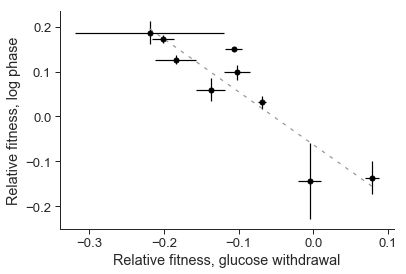

In [11]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

f, ax = plt.subplots()

[m, b, r, p, serr] = stats.linregress(s_withdrawal_mean, s_log_mean)

rr = r*r
print('R-squared: ' + str(rr))

xplot = np.arange(min(s_withdrawal_mean), max(s_withdrawal_mean) + 0.1, 0.1)

plt.errorbar(s_withdrawal_mean, s_log_mean, 
             xerr = s_withdrawal_stds, yerr = s_log_stds,
             fmt = '.', color = 'black', markersize = 10);

plt.plot(xplot, (m*xplot) + b, color = grays[4], linestyle = (0,(3,5)))

ax.set_xlabel('Relative fitness, glucose withdrawal')
ax.set_ylabel('Relative fitness, log phase')

sns.despine()

R-squared: 0.840376747009555


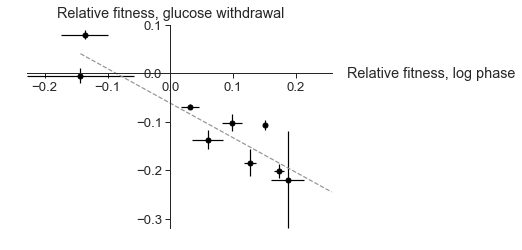

In [12]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

f, ax = plt.subplots()

[m, b, r, p, serr] = stats.linregress(s_log_mean, s_withdrawal_mean)

rr = r*r
print('R-squared: ' + str(rr))

xplot = np.arange(min(s_log_mean), max(s_log_mean) + 0.1, 0.1)

plt.errorbar(s_log_mean, s_withdrawal_mean, 
             xerr = s_log_stds, yerr = s_withdrawal_stds,
             fmt = '.', color = 'black', markersize = 10);

plt.plot(xplot, (m*xplot) + b, color = grays[4], linestyle = '--')

#plt.scatter(W5_means[1], W5_means[0], color = reds[4], s = 100)
#plt.scatter(W9_means[1], W9_means[0], color = greens[4], s = 100)



ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


# X-axis label
ax.annotate('Relative fitness, log phase', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(0, 0), textcoords='offset points',
            ha='left', va='center')

# Y-axis arrow
ax.annotate('Relative fitness, glucose withdrawal', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, 0), textcoords='offset points',
            ha='center', va='bottom')


sns.despine()

R-squared: 0.840376747009555


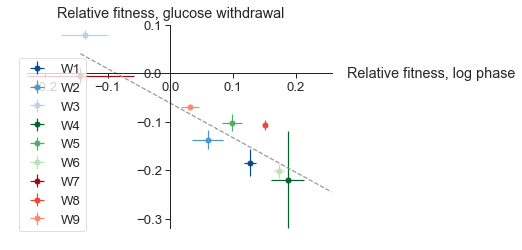

In [13]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

f, ax = plt.subplots()

[m, b, r, p, serr] = stats.linregress(s_log_mean, s_withdrawal_mean)

rr = r*r
print('R-squared: ' + str(rr))

xplot = np.arange(min(s_log_mean), max(s_log_mean) + 0.1, 0.1)

plt.errorbar(s_log_mean[0], s_withdrawal_mean[0], 
             xerr = s_log_stds[0], yerr = s_withdrawal_stds[0],
             fmt = '.', color = blues[8], markersize = 10, label = 'W1');
plt.errorbar(s_log_mean[1], s_withdrawal_mean[1], 
             xerr = s_log_stds[1], yerr = s_withdrawal_stds[1],
             fmt = '.', color = blues[5], markersize = 10, label = 'W2');
plt.errorbar(s_log_mean[2], s_withdrawal_mean[2], 
             xerr = s_log_stds[2], yerr = s_withdrawal_stds[2],
             fmt = '.', color = blues[2], markersize = 10, label = 'W3');
plt.errorbar(s_log_mean[3], s_withdrawal_mean[3], 
             xerr = s_log_stds[3], yerr = s_withdrawal_stds[3],
             fmt = '.', color = greens[8], markersize = 10, label = 'W4');
plt.errorbar(s_log_mean[4], s_withdrawal_mean[4], 
             xerr = s_log_stds[4], yerr = s_withdrawal_stds[4],
             fmt = '.', color = greens[5], markersize = 10, label = 'W5');
plt.errorbar(s_log_mean[5], s_withdrawal_mean[5], 
             xerr = s_log_stds[5], yerr = s_withdrawal_stds[5],
             fmt = '.', color = greens[2], markersize = 10, label = 'W6');
plt.errorbar(s_log_mean[6], s_withdrawal_mean[6], 
             xerr = s_log_stds[6], yerr = s_withdrawal_stds[6],
             fmt = '.', color = reds[8], markersize = 10, label = 'W7');
plt.errorbar(s_log_mean[7], s_withdrawal_mean[7], 
             xerr = s_log_stds[7], yerr = s_withdrawal_stds[7],
             fmt = '.', color = reds[5], markersize = 10, label = 'W8');
plt.errorbar(s_log_mean[8], s_withdrawal_mean[8], 
             xerr = s_log_stds[8], yerr = s_withdrawal_stds[8],
             fmt = '.', color = reds[3], markersize = 10, label = 'W9');



plt.plot(xplot, (m*xplot) + b, color = grays[4], linestyle = '--')


ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


# X-axis label
ax.annotate('Relative fitness, log phase', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(0, 0), textcoords='offset points',
            ha='left', va='center')

# Y-axis arrow
ax.annotate('Relative fitness, glucose withdrawal', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, 0), textcoords='offset points',
            ha='center', va='bottom')

ax.legend()



sns.despine()

R-squared: 0.840376747009555


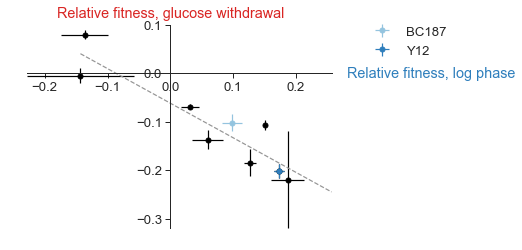

In [14]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

f, ax = plt.subplots()

[m, b, r, p, serr] = stats.linregress(s_log_mean, s_withdrawal_mean)

rr = r*r
print('R-squared: ' + str(rr))

xplot = np.arange(min(s_log_mean), max(s_log_mean) + 0.1, 0.1)

plt.errorbar(s_log_mean[[0,1,2,3,5,6,7,8]], s_withdrawal_mean[[0,1,2,3,5,6,7,8]], 
             xerr = s_log_stds[[0,1,2,3,5,6,7,8]], yerr = s_withdrawal_stds[[0,1,2,3,5,6,7,8]],
             fmt = '.', color = 'black', markersize = 10);

plt.plot(xplot, (m*xplot) + b, color = grays[4], linestyle = '--')

#plt.scatter(W5_means[1], W5_means[0], color = reds[4], s = 100)
#plt.scatter(W9_means[1], W9_means[0], color = greens[4], s = 100)

plt.errorbar(s_log_mean[4], s_withdrawal_mean[4],
            xerr = s_log_stds[4], yerr = s_withdrawal_stds[4],
             fmt = '.', color = blues[3], markersize = 10, label = 'BC187')
plt.errorbar(s_log_mean[5], s_withdrawal_mean[5],
            xerr = s_log_stds[5], yerr = s_withdrawal_stds[5],
             fmt = '.', color = blues[6], markersize = 10, label = 'Y12')

ax.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0, frameon = False);


ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


# X-axis label
ax.annotate('Relative fitness, log phase', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(0, 0), textcoords='offset points',
            ha='left', va='center', color = blues[6])

# Y-axis arrow
ax.annotate('Relative fitness, glucose withdrawal', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, 0), textcoords='offset points',
            ha='center', va='bottom', color = reds[6])

sns.despine()

R-squared: 0.840376747009555


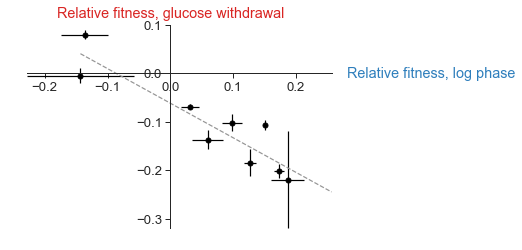

In [15]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

f, ax = plt.subplots()

[m, b, r, p, serr] = stats.linregress(s_log_mean, s_withdrawal_mean)

rr = r*r
print('R-squared: ' + str(rr))

xplot = np.arange(min(s_log_mean), max(s_log_mean) + 0.1, 0.1)

plt.errorbar(s_log_mean, s_withdrawal_mean, 
             xerr = s_log_stds, yerr = s_withdrawal_stds,
             fmt = '.', color = 'black', markersize = 10);

plt.plot(xplot, (m*xplot) + b, color = grays[4], linestyle = '--')

#plt.scatter(W5_means[1], W5_means[0], color = reds[4], s = 100)
#plt.scatter(W9_means[1], W9_means[0], color = greens[4], s = 100)




ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')



# X-axis label
ax.annotate('Relative fitness, log phase', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(0, 0), textcoords='offset points',
            ha='left', va='center', color = blues[6])

# Y-axis arrow
ax.annotate('Relative fitness, glucose withdrawal', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, 0), textcoords='offset points',
            ha='center', va='bottom', color = reds[6])


sns.despine()